In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()

import warnings
warnings.filterwarnings('ignore')

FileNotFoundError: [Errno 2] No such file or directory: 'style.css'

# Predicción de Series Temporales

## Bibliografía
<div class="exercise">
https://otexts.com/fpp3/graphics.html
</div>

## 1. Predicción: Flujo de trabajo "tidy"

El proceso de producir predicciones para  series temporales se puede dividir en las siguientes etapas.

![0201](img/02/workflow.png)

###  Preparación de datos (ordenads - tidy)

El primer paso en la predicción es preparar los datos en el formato correcto. Este proceso puede implicar la carga de datos, la identificación de valores perdidos, el filtrado de series  y otras tareas de preprocesamiento. 

Muchos modelos tienen diferentes requisitos de datos; algunos requieren que la serie esté en orden de tiempo, otros no requieren valores perdidos. La verificación de sus datos es un paso esencial para comprender sus características y siempre debe realizarse antes de estimar los modelos.

### Graficas la Serie (visualizar)

La visualización es un paso esencial para comprender los datos. Mirar sus datos le permite identificar patrones comunes y, posteriormente, especificar un modelo apropiado.

### Definir un modelo (especificar)

Hay muchos modelos de series de tiempo diferentes que se pueden usar para predecir. Especificar un modelo apropiado para los datos es esencial para producir predicciones apropiadas.

### Entrenar el modelo (estimación)

Una vez que se especifica un modelo apropiado, luego entrenamos el modelo con algunos datos. Se pueden estimar una o más especificaciones del modelo.


### Verificar el desempeño del modelo (evaluar)

Una vez que se ha ajustado un modelo, es importante comprobar qué tan bien ha funcionado con los datos. Hay varias herramientas de diagnóstico disponibles para verificar el comportamiento del modelo y también medidas de precisión que permiten comparar un modelo con otro. 

### Producir predicciones (predicción)

Con un modelo apropiado especificado, estimado y verificado, es el momento de producir las predicciones.



## Algunos métodos sencillos de predicción

Algunos métodos de predicción son extremadamente simples y sorprendentemente efectivos. Usaremos cuatro métodos simples de pronóstico como puntos de referencia. Para ilustrarlos, usaremos la producción trimestral de ladrillos de arcilla australiana entre 1970 y 2004.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np


### Método de la media

Aquí, las predicciones de todos los valores futuros son iguales a la media de los datos históricos. Si dejamos que los datos históricos se denoten por $y_{1},\dots,y_{T}$, entonces podemos escribir los pronósticos como

$$\hat{y}_{T+h|T} = \bar{y} = (y_{1}+\dots+y_{T})/T.$$
La notación $\hat{y}_{T+h|T}$ es una abreviatura para la estimación de $y_{T+h}$ basado en los datos $y_1,\dots,y_T$.

In [2]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

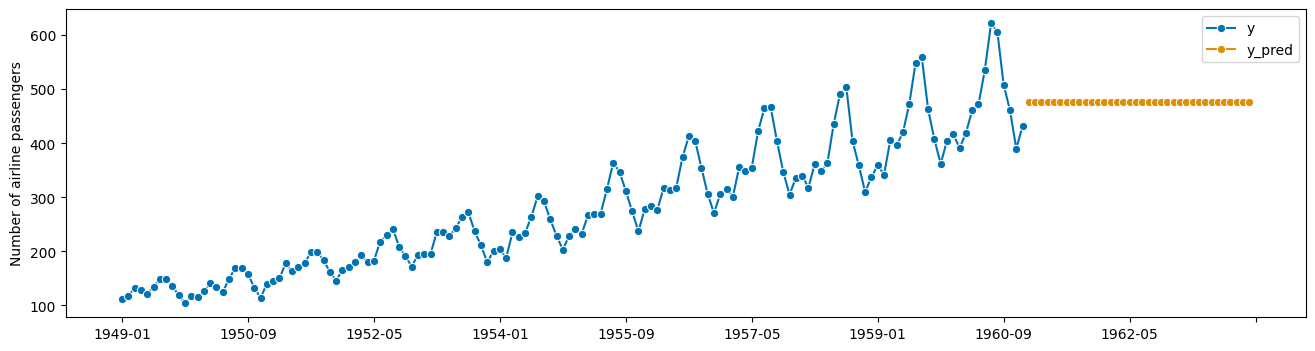

In [3]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="mean",window_length=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [4]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

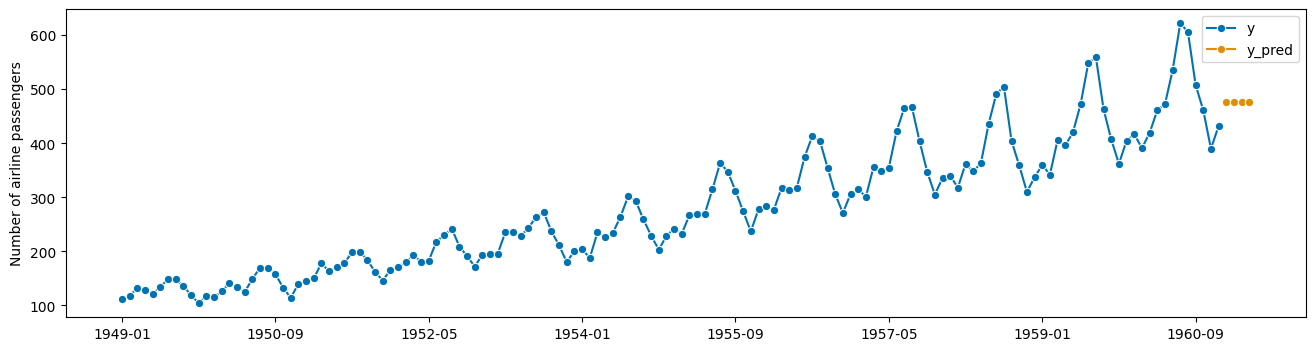

In [5]:

forecaster.fit(y)
# step 5: querying predictions
y_pred = forecaster.predict(fh=[1,2,3,4])
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

### Método ingenuo(Naïve)

Para predicciones ingenuas, simplemente establecemos todas las predicciones como el valor de la última observación. Es decir,
$$\hat{y}_{T+h|T} = y_{T}.$$
Este método funciona muy bien para muchas series de tiempo económicas y financieras.

Debido a que un pronóstico ingenuo es óptimo cuando los datos siguen un camino aleatorio (random walk), estos también se denominan predicción de camino aleatorio.


/home/codespace/.python/current/lib/python3.10/site-packages/sktime/forecasting/naive.py:348: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_filled = full_y.fillna(method="ffill").fillna(method="bfill")
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

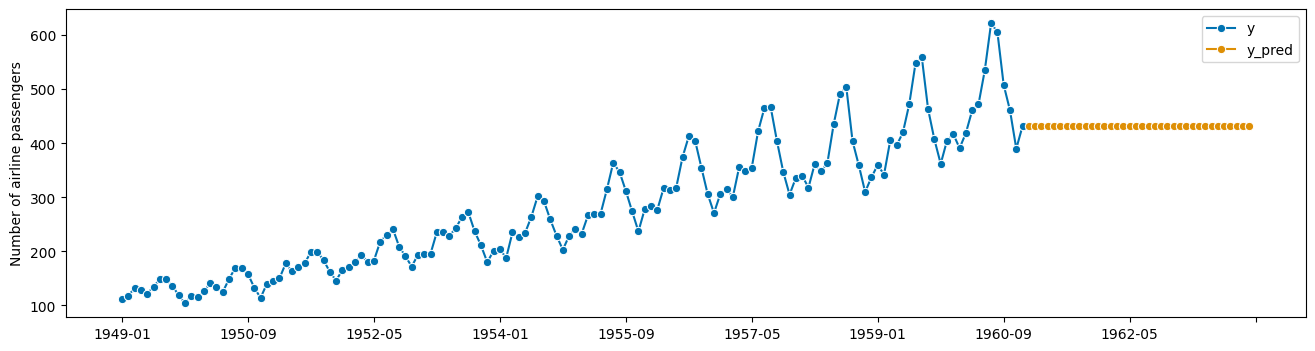

In [6]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last")

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])


### Método ingenuo (Naïve) estacional

Un método similar es utlizado para datos estacionales. En este caso, establecemos cada predicción para que sea igual al último valor observado de la misma estación del año (por ejemplo, el mismo mes del año anterior). Formalmente, la previsión de tiempo $T+h$ será:
$$\hat{y}_{T+h|T} = y_{T+h-m(k+1)},$$
dónde m es el período estacional, y k es la parte entera de $(h-1)/m$ (es decir, el número de años completos en el período de predicción antes del tiempo $T+h$ ). Esto parece más complicado de lo que realmente es. Por ejemplo, con datos mensuales, el pronóstico para todos los valores futuros de febrero es igual al último valor observado de febrero. Con datos trimestrales, el pronóstico de todos los valores futuros de Q2 es igual al último valor observado de Q2 (donde Q2 significa el segundo trimestre).

/home/codespace/.python/current/lib/python3.10/site-packages/sktime/forecasting/naive.py:361: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_filled = full_y.fillna(method="ffill").fillna(method="bfill")
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

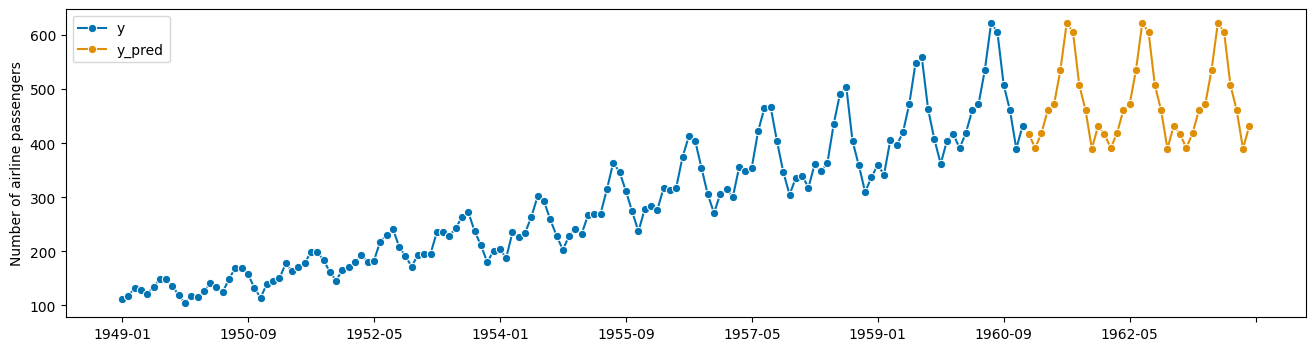

In [7]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last",sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

### Método de deriva (Drift)

Una variación del método ingenuo es permitir que las predicciones aumenten o disminuyan con el tiempo, donde la cantidad de cambio a lo largo del tiempo (llamado deriva) se establece como el cambio promedio visto en los datos históricos. Así, la predicción para $T+h$ es dado por

$$\hat{y}_{T+h|T} = y_{T} + \frac{h}{T-1}\sum_{t=2}^T (y_{t}-y_{t-1}) = y_{T} + h \left( \frac{y_{T} -y_{1}}{T-1}\right).$$


Esto equivale a trazar una línea entre la primera y la última observación y extrapolarla al futuro.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

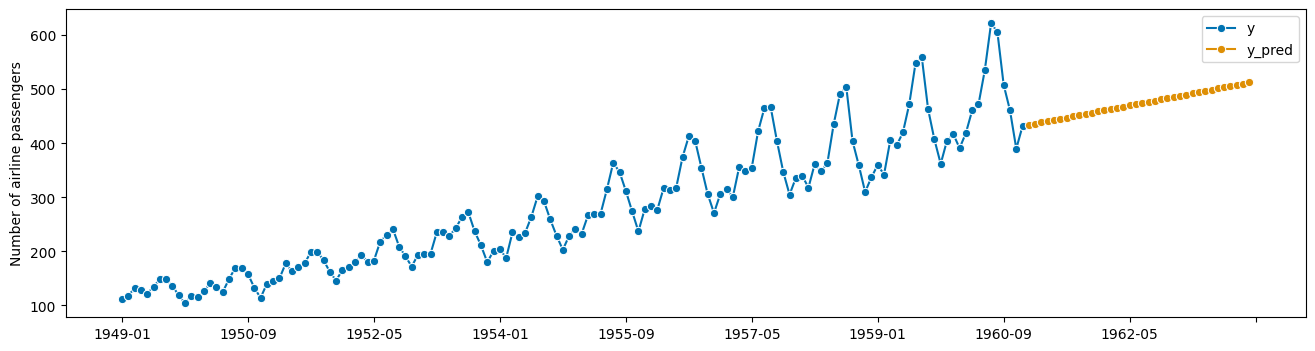

In [8]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="drift")

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

## Valores ajustados y residuales

### Valores ajustados

Cada observación de una serie de tiempo se puede predecir utilizando todas las observaciones anteriores. Llamamos a estos valores ajustados y se denotan por $\hat{y}_{t|t-1}$, es decir, la predicción de $y_t$ basado en observaciones $y_{1},\dots,y_{t-1}$. Los usamos con tanta frecuencia que a veces descartamos parte del subíndice y simplemente escribimos $\hat{y}_t$ en lugar de $\hat{y}_{t|t-1}$. 

### Valores residuales (Residuos)

Los residuos en un modelo de series temporales son lo que queda después de ajustar un modelo. Los residuos son iguales a la diferencia entre las observaciones y los valores ajustados correspondientes:
$$e_{t} = y_{t}-\hat{y}_{t}.$$
 
Si se ha utilizado una transformación en el modelo, a menudo es útil observar los residuos en la escala transformada. A estos los llamamos "residuos de innovación". Por ejemplo, supongamos que transformamos mediante logaritmos los datos, $w_t = \log(y_t)$. Entonces los residuos de innovación están dados por $w_t - \hat{w}_t$ mientras que los residuos regulares están dados por $y_t - \hat{y}_t$. Si no se ha utilizado ninguna transformación, los residuos de innovación son idénticos a los residuos regulares y, en tales casos, los llamaremos simplemente "residuos".

Los residuos son útiles para verificar si un modelo ha capturado adecuadamente la información en los datos. Para ello, utilizamos residuos de innovación.

Si se observan patrones en los residuos de innovación, probablemente se pueda mejorar el modelo.

/home/codespace/.python/current/lib/python3.10/site-packages/sktime/forecasting/base/_base.py:1022: UserWarning: empty y passed to update_predict, no update was carried out
  warn("empty y passed to update_predict, no update was carried out")


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

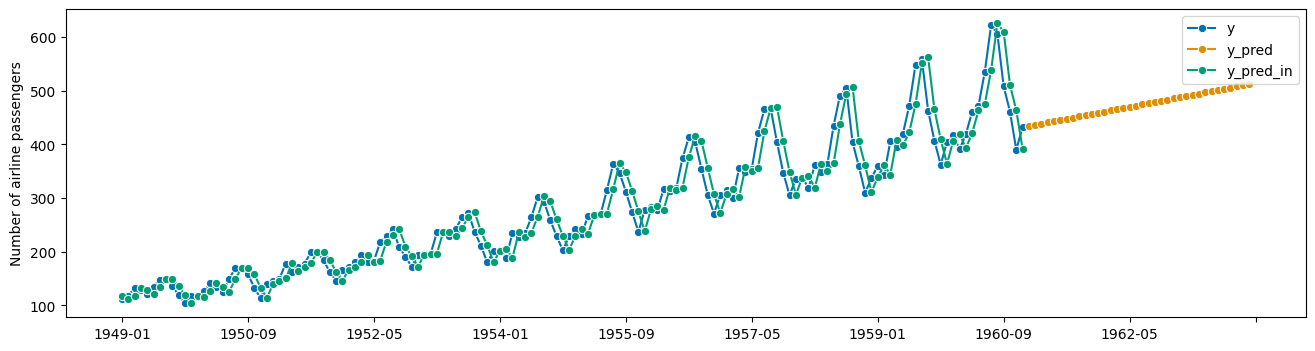

In [9]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)
# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="drift")

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred_in = forecaster.predict(fh=y.index)
y_pred = forecaster.predict(fh=fh)

# optional: plotting predictions and past data
plot_series(y, y_pred,y_pred_in, labels=["y", "y_pred","y_pred_in"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

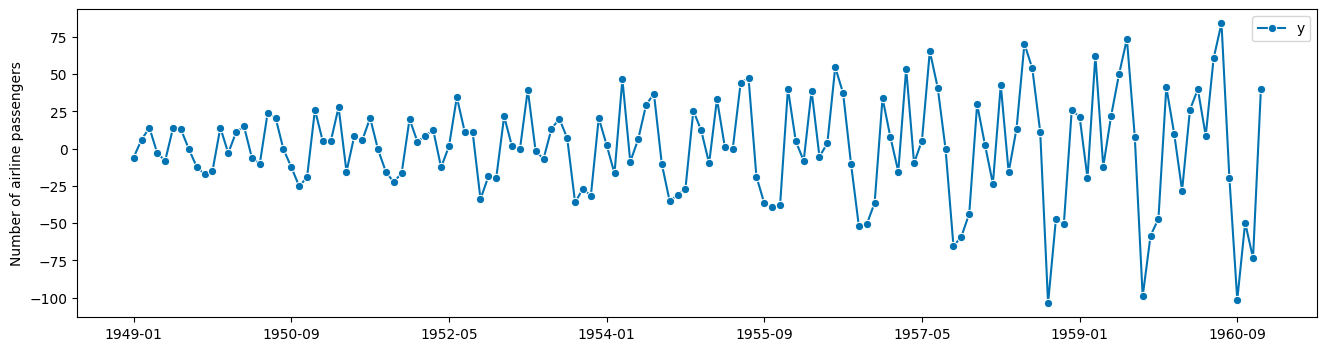

In [10]:
# optional: plotting predictions and past data
plot_series(y-y_pred_in, labels=["y"])

## Análisis de Residuos (Diagnóstico)

Un buen método de predicción producirá residuos  con las siguientes propiedades:

- Los residuos no están correlacionados. Si existen correlaciones entre los residuos, entonces queda información en los residuos que debe usarse para calcular las predicciones.
  
- Los residuos tienen media cero. Si tienen una media distinta de cero, las predicciones están sesgados.
  
Cualquier método de predicción que no satisfaga estas propiedades puede mejorarse. Sin embargo, eso no significa que los métodos de predicción que satisfagan estas propiedades no puedan mejorarse. Es posible tener varios métodos de predicción diferentes para el mismo conjunto de datos, todos los cuales satisfacen estas propiedades. Verificar estas propiedades es importante para ver si un método utiliza toda la información disponible, pero no es una buena forma de seleccionar un modelo de predicción.

Si alguna de estas propiedades no se satisface, entonces el método de predicción puede modificarse para brindar mejores predicciones. 

Ajustar el sesgo es fácil: si los residuos tienen media m, simplemente restando m a todos las predicciones y se resuelve el problema del sesgo. 

Arreglar el problema de correlación es más difícil y no lo abordaremos en próximos temas.

Además de estas propiedades esenciales, es útil (pero no necesario) que los residuos también tengan las dos propiedades siguientes.

- Los residuos tienen una varianza constante. Esto se conoce como "homocedasticidad".

- Los residuos se distribuyen normalmente.
  
Estas dos propiedades facilitan el cálculo de los intervalos de predicción. Sin embargo, un método de predicción que no satisfaga estas propiedades no necesariamente puede mejorarse. A veces, aplicar una transformación de Box-Cox puede ayudar con estas propiedades, pero por lo demás, por lo general, es poco lo que puede hacer para asegurarse de que sus residuos  tengan una varianza constante y una distribución normal. En cambio, es necesario un enfoque alternativo para obtener intervalos de predicción. 

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


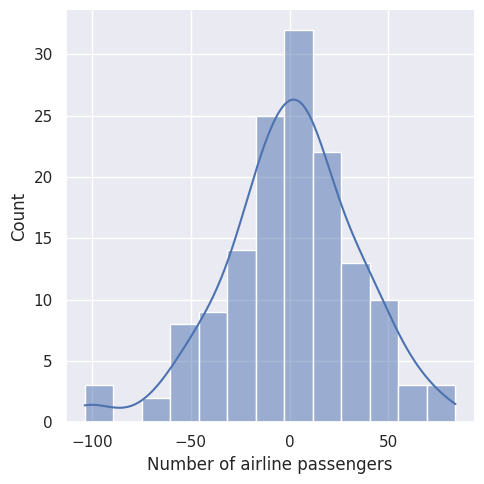

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
residual=y-y_pred_in
residual=residual.dropna()
sns.set(rc={"figure.figsize": (8, 4)})
ax = sns.displot(residual,kde=True)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Number of airline passengers'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

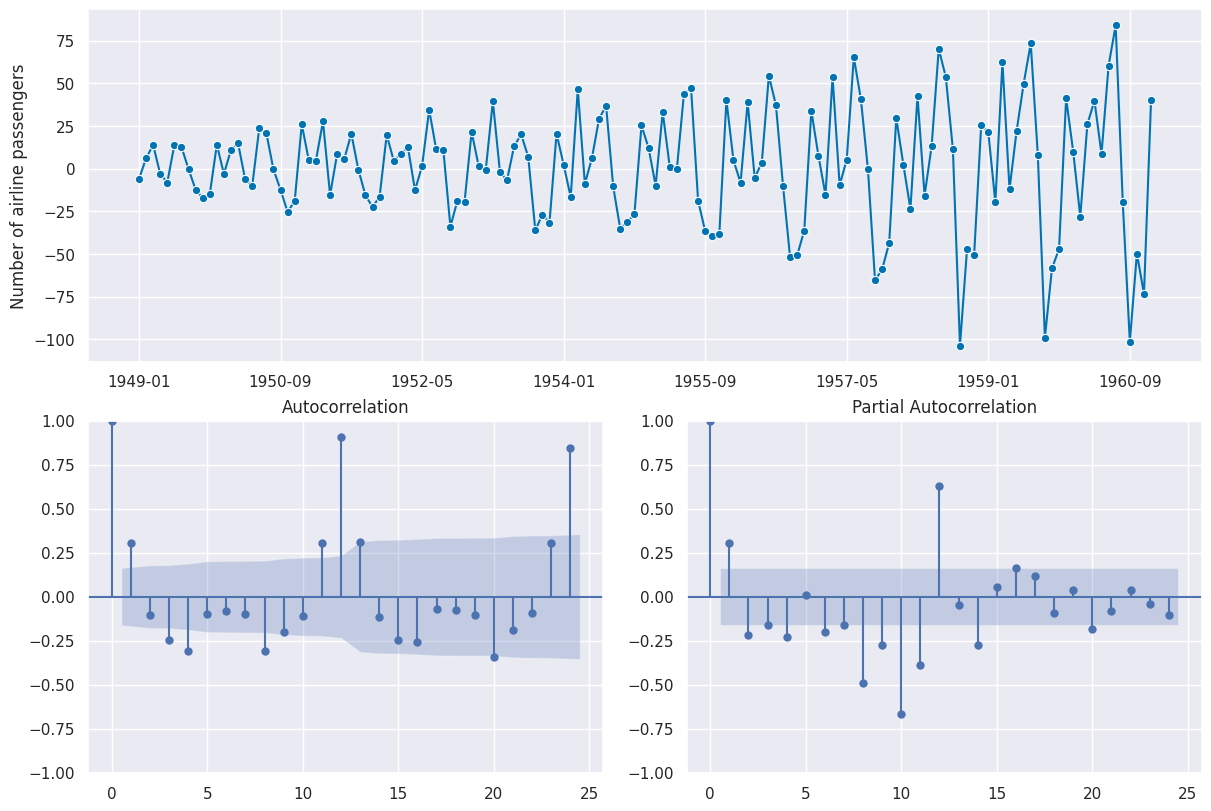

In [12]:
from sktime.utils.plotting import plot_correlations
plot_correlations(residual)

## Distribuciones e intervalos de predicción

### Distribuciones de predicción

la incertidumbre en nuestras predicciones se expresa usando una distribución de probabilidad. 
Describe la probabilidad de observar posibles valores futuros utilizando el modelo ajustado. 
La predicción puntual es la media de esta distribución. La mayoría de los modelos producen predicciones distribuidas normalmente, es decir, asumimos que la distribución de posibles valores futuros sigue una distribución normal. 

### Intervalos de predicción

Un intervalo de predicción da un intervalo dentro del cual esperamos que $y_{t}$ se encuentre con una probabilidad especificada. Por ejemplo, suponiendo que la distribución de las observaciones futuras es normal, un intervalo de predicción del 95% para un horizonte de predicción h es

$$\hat{y}_{T+h|T} \pm 1.96 \hat\sigma_h,$$

dónde $\hat\sigma_h$ es una estimación de la desviación estándar de la distribución de predicción horizonte h.

De manera más general, un intervalo de predicción se puede escribir como

$$\hat{y}_{T+h|T} \pm c \hat\sigma_h$$

donde el multiplicador $c$ depende de la probabilidad de cobertura. Normalmente calculamos intervalos de 80% e intervalos de 95%, aunque se puede utilizar cualquier porcentaje.

El valor de los intervalos de predicción es que expresan la incertidumbre en las predicciones. Si solo producimos predicciones puntuales, no hay forma de saber qué tan precisas son. Sin embargo, si también producimos intervalos de predicción, queda claro cuánta incertidumbre está asociada con cada predicción. Por esta razón, las predicciones puntuales pueden no tener casi ningún valor sin los intervalos de predicción que los acompañan.

### Intervalos de predicción horizonte uno (one-step)

Al predecir un paso adelante, la desviación estándar de la distribución del predicción se puede estimar utilizando la desviación estándar de los residuales dada por

$$\begin{equation}
  \hat{\sigma} = \sqrt{\frac{1}{T-K}\sum_{t=1}^T e_t^2}, \tag{5.1}
\end{equation}$$


dónde $K$ es el número de parámetros estimados en el método de predicción.

### Intervalos de predicción de varios pasos (multi-step)

Una característica común de los intervalos de predicción es que generalmente aumentan de longitud a medida que aumenta el horizonte de predicción. Cuanto más adelante pronostiquemos, más incertidumbre se asociará con la predicción y, por lo tanto, más amplios serán los intervalos de predicción. Es decir,
$\sigma_h$  generalmente aumenta con $h$ (aunque existen algunos métodos de predicción no lineales que no tienen esta propiedad).

Para producir un intervalo de predicción, es necesario tener una estimación de $\sigma_h$. Para las prediccioners de varios pasos, se requiere un método de cálculo más complicado que para el horizonte uno. Estos cálculos asumen que los residuos no están correlacionados.



In [13]:
from sktime.forecasting.theta import ThetaForecaster
y = load_airline()
fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y)

# setting return_pred_int argument to True; alpha determines percentiles
#  intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
#alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred = forecaster.predict(fh)

In [14]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Number of airline passengers            
                                 0.9            
                               lower       upper
1961-01                   418.280121  464.281951
1961-02                   402.215881  456.888055
1961-03                   459.966113  522.110500
1961-04                   442.589309  511.399214
1961-05                   443.525027  518.409480
1961-06                   506.585814  587.087737
1961-07                   561.496768  647.248956
1961-08                   557.363322  648.062363
1961-09                   477.658056  573.047752
1961-10                   407.915090  507.775355
1961-11                   346.942924  451.082016
1961-12                   394.708221  502.957142

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

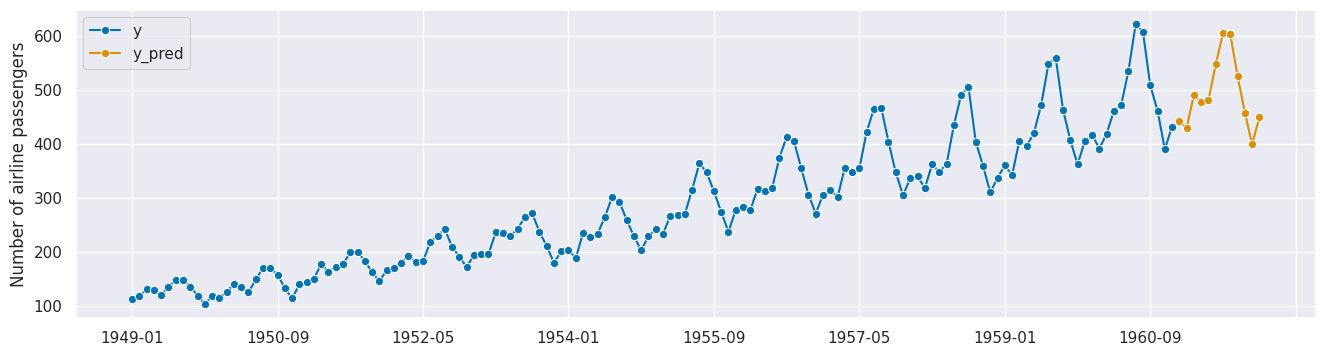

In [15]:
fig, ax = plot_series(y, y_pred, labels=["y", "y_pred"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

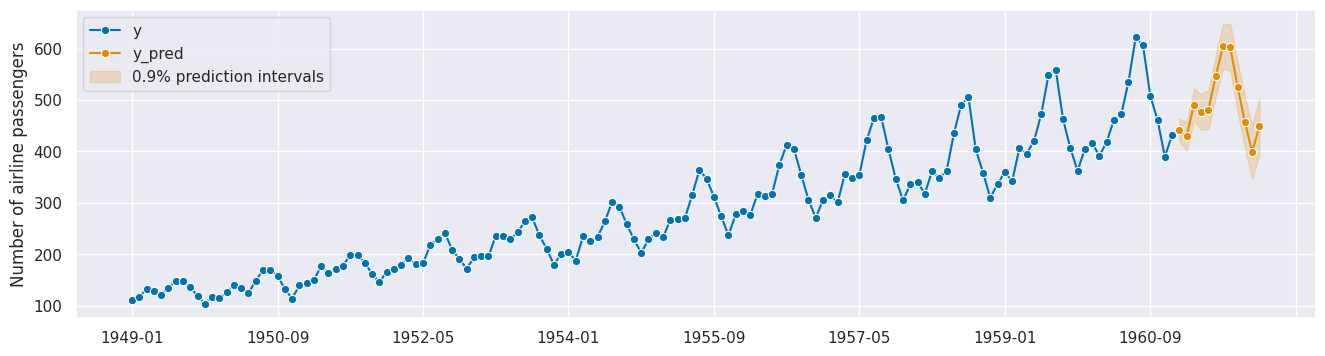

In [16]:

fig, ax = plot_series(y, y_pred, labels=["y", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints['Number of airline passengers', 0.9, 'lower'],
    y_pred_ints['Number of airline passengers', 0.9, 'upper'],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage}% prediction intervals",
)
ax.legend();

## Predicciones mediante transformaciones

Al prredecir a partir de un modelo con transformaciones, primero producimos pronósticos de los datos transformados. Luego, necesitamos revertir la transformación (o transformación inversa) para obtener pronósticos en la escala original. 

Para las transformaciones de Box-Cox dadas por 

$$\begin{equation}
  w_t  =
    \begin{cases}
      \log(y_t) & \text{if $\lambda=0$};  \\
      (\text{sign}(y_t)|y_t|^\lambda-1)/\lambda & \text{otherwise}.
    \end{cases}
\end{equation}$$

la transformación inversa está dada por

$$\begin{equation}
\tag{5.2}
  y_{t} =
    \begin{cases}
      \exp(w_{t}) & \text{if $\lambda=0$};\\
      \text{sign}(\lambda w_t+1)|\lambda w_t+1|^{1/\lambda} & \text{otherwise}.
    \end{cases}
\end{equation}$$


### Intervalos de predicción con transformaciones

Si se ha utilizado una transformación, entonces el intervalo de predicción se calcula primero en la escala transformada y los puntos finales se transforman hacia atrás para dar un intervalo de predicción en la escala original. Este enfoque conserva la cobertura de probabilidad del intervalo de predicción, aunque ya no será simétrico alrededor del pronóstico puntual.

Las transformaciones a veces hacen poca diferencia en los pronósticos puntuales, pero tienen un gran efecto en los intervalos de predicción.

### Ajustes de sesgo

Un problema con el uso de transformaciones matemáticas como las transformaciones de Box-Cox es que la predicción puntual transformado hacia atrás no será la media de la distribución de la predicción. De hecho, generalmente será la mediana de la distribución de predicción (asumiendo que la distribución en el espacio transformado es simétrica). Para muchas predicciones, esto es aceptable, aunque la media suele ser preferible. Por ejemplo, es posible que desee sumar pronósticos de ventas de varias regiones para formar un pronóstico para todo el país. Pero las medianas no suman, mientras que las medias sí.

Para una transformación de Box-Cox, la media transformada hacia atrás viene dada (aproximadamente) por
de lo contrario;
  
$$\begin{equation}
\tag{5.3}
\hat{y}_{T+h|T} =
  \begin{cases}
     \exp(\hat{w}_{T+h|T})\left[1 + \frac{\sigma_h^2}{2}\right] & \text{if $\lambda=0$;}\\
     (\lambda \hat{w}_{T+h|T}+1)^{1/\lambda}\left[1 + \frac{\sigma_h^2(1-\lambda)}{2(\lambda \hat{w}_{T+h|T}+1)^{2}}\right] & \text{otherwise;}
  \end{cases}
\end{equation}$$

 
dónde $\hat{w}_{T+h|T}$ es la predicción media horizonte $h$ y $\sigma_h^2$  es la varianza de predicción horizonte $h$ en la escala transformada. Cuanto mayor sea la varianza dela predicción, mayor será la diferencia entre la media y la mediana.

La diferencia entre la predicción transformada hacia atrás sy la media se llama sesgo. Cuando usamos la media, en lugar de la mediana, decimos que los pronósticos puntuales se han ajustado al sesgo.


In [17]:
from sktime.transformations.series.boxcox import BoxCoxTransformer
from sktime.datasets import load_airline
y = load_airline()
transformer = BoxCoxTransformer()
y_hat = transformer.fit_transform(y)
y_hat.tail()

Period
1960-08    10.684049
1960-09    10.234573
1960-10     9.992159
1960-11     9.582623
1960-12     9.831860
Freq: M, Name: Number of airline passengers, dtype: float64

In [18]:
transformer.lambda_

0.14802265137037945

## Evaluación de la precisión de la predicción puntual

### Muestras de entrenamiento y prueba (Training & Test)

Es importante evaluar la precisión de las predicciones utilizando valores reales. En consecuencia, el tamaño de los residuos no es una indicación confiable de cuán grandes pueden ser los verdaderos errores de predicción. La precisión de las predicciones solo se puede determinar considerando qué tan bien se desempeña un modelo con datos nuevos que no se usaron al ajustar el modelo.

Al elegir modelos, es una práctica común separar los datos disponibles en dos partes, datos de entrenamiento y de prueba, donde los datos de entrenamiento se usan para estimar cualquier parámetro de un método de predicción y los datos de prueba se usan para evaluar su precisión. Debido a que los datos de prueba no se utilizan para determinar las predicciones, deberían proporcionar una indicación fiable de qué tan bien es probable que el modelo pronostique sobre nuevos datos.

![0202](img/02/traintest.png)

El tamaño del conjunto de prueba suele ser aproximadamente el 20% de la muestra total, aunque este valor depende de la longitud de la muestra y de la anticipación que desee realizar. Idealmente, el conjunto de prueba debería ser al menos tan grande como el horizonte de pronóstico máximo requerido. Deben tenerse en cuenta los siguientes puntos.

- Un modelo que se ajusta bien a los datos de entrenamiento no necesariamente hará un buen pronóstico.

- Siempre se puede obtener un ajuste perfecto utilizando un modelo con suficientes parámetros.
  
- Sobreajustar (overfitting) un modelo a los datos es tan malo como no identificar un patrón sistemático en los datos.
- 
Algunas referencias describen el conjunto de prueba como el "conjunto de reserva" (hold-out set) porque estos datos se "excluyen" de los datos utilizados para el ajuste. Otras referencias llaman al conjunto de entrenamiento los "datos dentro de la muestra" (in-sample) y al conjunto de prueba los "datos fuera de la muestra" (out of sample). Preferimos utilizar "datos de entrenamiento" (training data) y "datos de prueba" (testing data).


**Podemos medir la precisión del pronóstico resumiendo los errores de pronóstico de diferentes maneras.**

## Errores dependientes de la escala

Los errores de pronóstico están en la misma escala que los datos. Medidas de precisión que se basan únicamente en $e_{t}$  por lo tanto, dependen de la escala y no se pueden utilizar para hacer comparaciones entre series que involucran diferentes unidades.

Las dos medidas dependientes de escala más utilizadas se basan en los errores absolutos o errores cuadrados:
$$\begin{align*}
  \text{Mean absolute error: MAE} & = \text{mean}(|e_{t}|),\\
  \text{Root mean squared error: RMSE} & = \sqrt{\text{mean}(e_{t}^2)}.
\end{align*}$$
 
Al comparar los métodos de predicción aplicados a una sola serie de tiempo, o a varias series de tiempo con las mismas unidades, el MAE es popular ya que es fácil de entender y calcular. Un método de pronóstico que minimice el MAE conducirá a pronósticos de la mediana, mientras que minimizar el RMSE conducirá a pronósticos de la media. En consecuencia, el RMSE también se utiliza mucho, a pesar de ser más difícil de interpretar.

## Errores porcentuales

El error porcentual viene dado por $p_{t} = 100 e_{t}/y_{t}$. Los errores porcentuales tienen la ventaja de no tener unidades, por lo que se utilizan con frecuencia para comparar los resultados de las previsiones entre conjuntos de datos. La medida más utilizada es:


$$\text{Mean absolute percentage error: MAPE} = \text{mean}(|p_{t}|).$$

 
Las medidas basadas en errores porcentuales tienen la desventaja de ser infinitas o indefinidas si exite alguna $y_{t}=0$ en el período de interés, y tener valores extremos si los hay $y_{t}$ queestá cerca de cero. Otro problema con los errores porcentuales que a menudo se pasa por alto es que asumen que la unidad de medida tiene un cero significativo. Por ejemplo, un error porcentual no tiene sentido cuando se mide la precisión de los pronósticos de temperatura en las escalas Fahrenheit o Celsius, porque la temperatura tiene un punto cero arbitrario.


### Errores escalados

Hyndman y Koehler (2006) propusieron errores escalados como una alternativa al uso de errores porcentuales al comparar la precisión de la predicción entre series con diferentes unidades. Propusieron escalar los errores en función del MAE de entrenamiento a partir de un método de pronóstico simple.

Para una serie de tiempo no estacional, una forma útil de definir un error escalado utiliza predicciones naïve:

$$q_{j} = \frac{\displaystyle e_{j}}
    {\displaystyle\frac{1}{T-1}\sum_{t=2}^T |y_{t}-y_{t-1}|}.$$

 
Debido a que el numerador y el denominador involucran valores en la escala de los datos originales, $q_{j}$ es independiente de la escala de los datos. 

Un error escalado es menor que uno si surge de una predicción mejor que la predicción ingenua promedio de un paso calculado en los datos de entrenamiento. Por el contrario, es mayor que uno si la predicción es peor que la predicción ingenuo promedio de un paso calculado en los datos de entrenamiento.

Para las series de tiempo estacionales, se puede definir un error escalado utilizando predicciones estacionales ingenuos:

$$q_{j} = \frac{\displaystyle e_{j}}
    {\displaystyle\frac{1}{T-m}\sum_{t=m+1}^T |y_{t}-y_{t-m}|}.$$

El error de escala absoluto medio es simplemente

$$\text{MASE} = \text{mean}(|q_{j}|).$$

De manera similar, el error escalado cuadrático medio de la raíz viene dado por

$$\text{RMSSE} = \sqrt{\text{mean}(q_{j}^2)},$$
 
dónde

$$q^2_{j} = \frac{\displaystyle e^2_{j}}
    {\displaystyle\frac{1}{T-m}\sum_{t=m+1}^T (y_{t}-y_{t-m})^2},$$


y ponemos $m=1$ para datos no estacionales.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

108 36


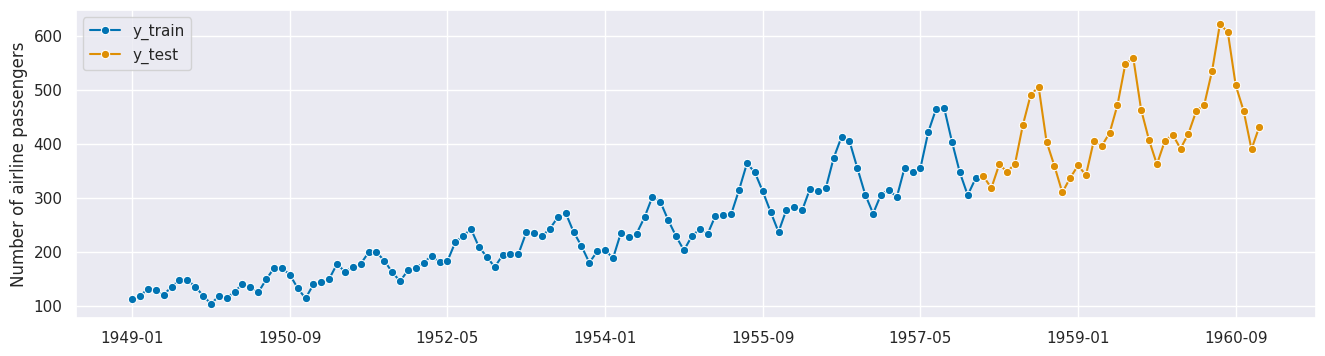

In [19]:
from sktime.forecasting.model_selection import temporal_train_test_split
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

/home/codespace/.python/current/lib/python3.10/site-packages/sktime/forecasting/naive.py:361: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_filled = full_y.fillna(method="ffill").fillna(method="bfill")
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

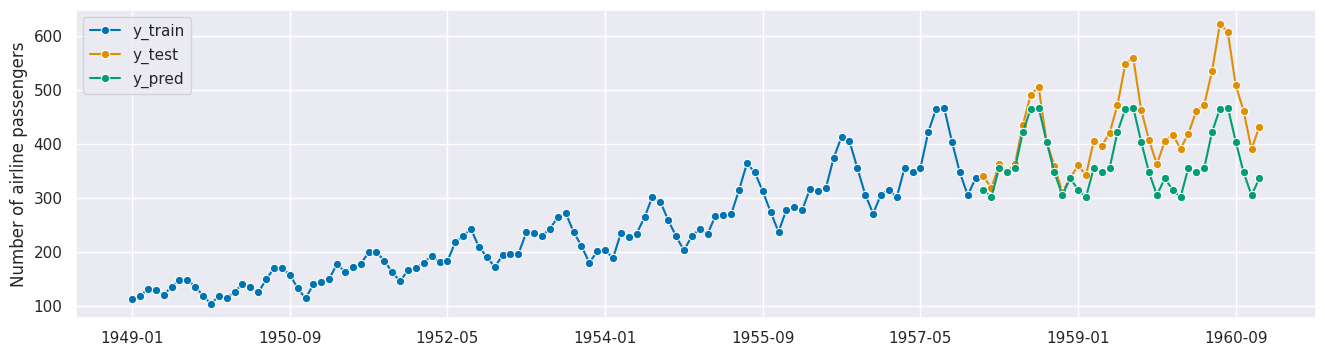

In [20]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [21]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred)

0.13189432350948402

In [22]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, y_pred)

5418.75

In [23]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_pred)

73.61215932167728

In [24]:
from sktime.performance_metrics.forecasting import     MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(y_test, y_pred)

0.13189432350948402

## Validación cruzada de series temporales (Cross-Validation)

**Una versión más sofisticada de los conjuntos de entrenamiento / prueba es la validación cruzada de series de tiempo.**

En este procedimiento, hay una serie de conjuntos de prueba, cada uno de los cuales consta de una única observación. El conjunto de entrenamiento correspondiente consta solo de observaciones que ocurrieron antes de la observación que forma el conjunto de prueba. Por lo tanto, no se pueden utilizar observaciones futuras para construir la predicción. Dado que no es posible obtener un pronóstico confiable basado en un pequeño conjunto de entrenamiento, las primeras observaciones no se consideran conjuntos de prueba.

El siguiente diagrama ilustra la serie de conjuntos de entrenamiento y prueba, donde las observaciones azules forman los conjuntos de entrenamiento y las observaciones naranjas forman los conjuntos de prueba.

![0203](img/02/cv01.jpeg)

La precisión del pronóstico se calcula promediando los conjuntos de prueba. Este procedimiento a veces se conoce como "evaluación en un origen de pronóstico continuo" porque el "origen" en el que se basa el pronóstico avanza en el tiempo.

Con las predicciones de series temporales, las predicciones de un paso pueden no ser tan relevantes como los pronósticos de varios pasos. En este caso, el procedimiento de validación cruzada basado en un origen de pronóstico continuo se puede modificar para permitir el uso de errores de varios pasos. Supongamos que estamos interesados ​​en modelos que producen buenos 4-previsiones anticipadas. Entonces el diagrama correspondiente se muestra a continuación.

![0203](img/02/cv03.jpeg)

![0204](img/02/cv02.png)



In [25]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter
from sktime.forecasting.arima import AutoARIMA, ARIMA


y_train, y_test = temporal_train_test_split(y, test_size=36)

fh = ForecastingHorizon(np.arange(len(y_test)) + 1, is_relative=True)
forecaster_param_grid = {}
forecaster = forecaster = ARIMA(order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),suppress_warnings=True)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.90), start_with_window=True)
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True)

gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mape(y_test, y_pred)

ModuleNotFoundError: ARIMA requires package 'pmdarima' to be present in the python environment, but 'pmdarima' was not found. 'pmdarima' is a soft dependency and not included in the base sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`

In [ ]:
gscv